In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D


In [6]:
data = pd.read_csv('weights_heights.csv',index_col='Index')

In [7]:
print data

         Height     Weight
Index                     
1      65.78331  112.99250
2      71.51521  136.48730
3      69.39874  153.02690
4      68.21660  142.33540
5      67.78781  144.29710
6      68.69784  123.30240
7      69.80204  141.49470
8      70.01472  136.46230
9      67.90265  112.37230
10     66.78236  120.66720
11     66.48769  127.45160
12     67.62333  114.14300
13     68.30248  125.61070
14     67.11656  122.46180
15     68.27967  116.08660
16     71.09160  139.99750
17     66.46100  129.50230
18     68.64927  142.97330
19     71.23033  137.90250
20     67.13118  124.04490
21     67.83379  141.28070
22     68.87881  143.53920
23     63.48115   97.90191
24     68.42187  129.50270
25     67.62804  141.85010
26     67.20864  129.72440
27     70.84235  142.42350
28     67.49434  131.55020
29     66.53401  108.33240
30     65.44098  113.89220
...         ...        ...
24971  65.37753  126.61020
24972  67.49720  122.98440
24973  68.70055  123.28490
24974  71.32072  125.59280
2

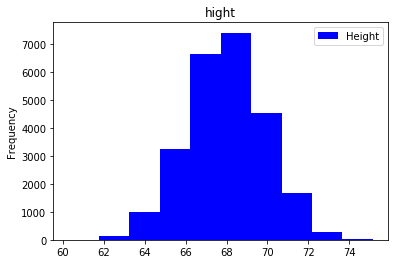

In [8]:
data.plot (y = 'Height', kind = 'hist' ,color= 'b' , title = 'hight' )

In [9]:
data.head(5)

Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971

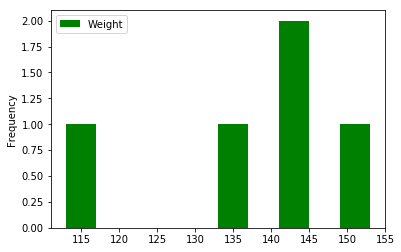

In [10]:
data.head(5).plot( y ='Weight',kind = 'hist',color = 'g')

In [11]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2


In [12]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [13]:
print data

         Height     Weight        BMI
Index                                
1      65.78331  112.99250  18.357573
2      71.51521  136.48730  18.762577
3      69.39874  153.02690  22.338895
4      68.21660  142.33540  21.504526
5      67.78781  144.29710  22.077581
6      68.69784  123.30240  18.368870
7      69.80204  141.49470  20.417428
8      70.01472  136.46230  19.571813
9      67.90265  112.37230  17.134953
10     66.78236  120.66720  19.022290
11     66.48769  127.45160  20.270287
12     67.62333  114.14300  17.549036
13     68.30248  125.61070  18.930007
14     67.11656  122.46180  19.113418
15     68.27967  116.08660  17.506380
16     71.09160  139.99750  19.475149
17     66.46100  129.50230  20.612982
18     68.64927  142.97330  21.329476
19     71.23033  137.90250  19.109060
20     67.13118  124.04490  19.352071
21     67.83379  141.28070  21.586775
22     68.87881  143.53920  21.271413
23     63.48115   97.90191  17.080425
24     68.42187  129.50270  19.448496
25     67.62

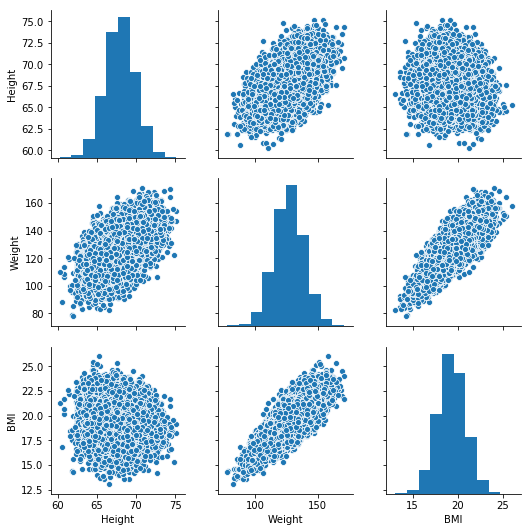

In [14]:
pict = sns.pairplot(data)

         Height    Weight        BMI  weight_cat
Index                                           
1      65.78331  112.9925  18.357573           1
2      71.51521  136.4873  18.762577           3
3      69.39874  153.0269  22.338895           2
4      68.21660  142.3354  21.504526           3
5      67.78781  144.2971  22.077581           3


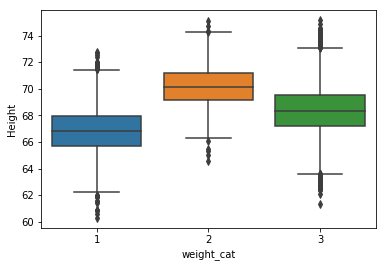

In [15]:
i = []
def weight_category(Weight):
    if Weight < 120:
        return  1
    elif Weight >= 150:
        return  2
    else:
        return 3
data['weight_cat'] = data['Weight'].apply(weight_category)
print data.head(5)
sns.boxplot(x='weight_cat', y='Height', data=data )
plt.show()

In [16]:
data['weight_cat'] = data['Weight'].apply(weight_category)

In [17]:
print data

         Height     Weight        BMI  weight_cat
Index                                            
1      65.78331  112.99250  18.357573           1
2      71.51521  136.48730  18.762577           3
3      69.39874  153.02690  22.338895           2
4      68.21660  142.33540  21.504526           3
5      67.78781  144.29710  22.077581           3
6      68.69784  123.30240  18.368870           3
7      69.80204  141.49470  20.417428           3
8      70.01472  136.46230  19.571813           3
9      67.90265  112.37230  17.134953           1
10     66.78236  120.66720  19.022290           3
11     66.48769  127.45160  20.270287           3
12     67.62333  114.14300  17.549036           1
13     68.30248  125.61070  18.930007           3
14     67.11656  122.46180  19.113418           3
15     68.27967  116.08660  17.506380           1
16     71.09160  139.99750  19.475149           3
17     66.46100  129.50230  20.612982           3
18     68.64927  142.97330  21.329476           3


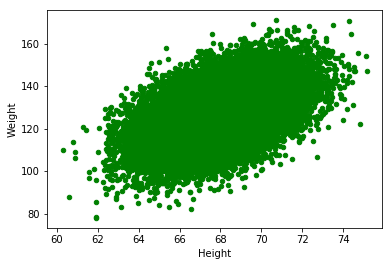

In [18]:
data.plot( y ='Weight',x = 'Height' ,kind = 'scatter',color = 'g')

In [19]:
def error(w,data):
    return sum ((data['Height'] - w[0]-w[1]*data['Weight'])**2)
print error((60,0.05),data)

138197.379428


w[0]= 60__ w[1]= 0.05__ 138197.379428


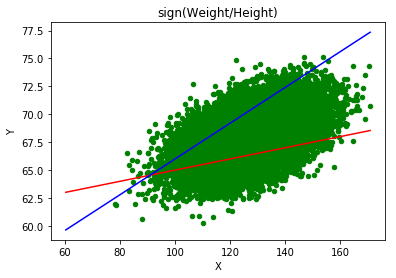

In [20]:
print 'w[0]= 60__','w[1]= 0.05__'  , error((60.,0.05),data)
w0= 60 
w1= 0.05
data.plot( y ='Height',x = 'Weight' ,kind = 'scatter',color = 'g')
x = np.linspace(data['Height'].min() , data['Weight'].max(),100)
y = w0+w1*x
plt.plot (x,y,color = 'red')
w2 = 50
w3 = 0.16
y = w2+w3*x
plt.plot (x,y,color = 'blue')
plt.title('sign(Weight/Height)')
plt.xlabel('X')
plt.ylabel("Y")
plt.show()


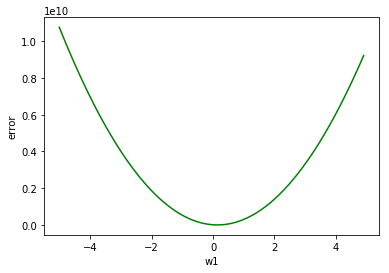

In [21]:
w1 = np.arange(-5,5,0.1)
plt.plot(w1,list(map(lambda w1:error((50,w1),data),w1)),color = 'g')
plt.xlabel('w1')
plt.ylabel('error')
plt.show()


In [22]:
def w1_error(w1):
    return error((50,w1),data)
optimize.minimize_scalar(w1_error,bounds=(-5, 5))

     fun: 79512.21728699488
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834388

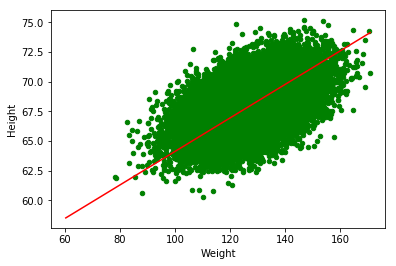

In [23]:
data.plot( x ='Weight',y = 'Height' ,kind = 'scatter',color = 'g')
x = np.linspace(data['Height'].min() , data['Weight'].max(),100)
w0= 50 
w1= 0.14109203728834388
y = w0+w1*x
plt.plot (x,y,color = 'red')

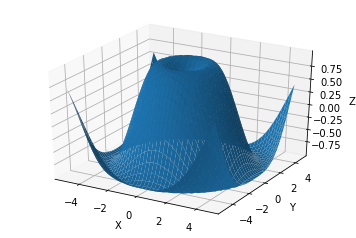

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

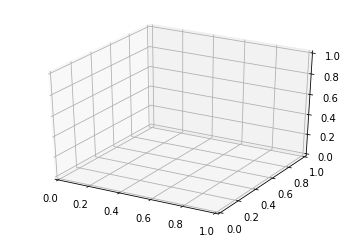

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')
w0 = np.arange(40,80,0.5)
w1 = np.arange(-5, 5, 0.25)
w0, w1 = np.meshgrid(w0, w1)
Z = np.zeros((len(w0), len(w0[i])))
for i in range (0, len(w0)):
    for j in range (0, len(w0[i])):
        Z[i][j] = error((w0[i][j], w1[i][j]), data)
surf = ax.plot_surface(w0,w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('error')
plt.show()

In [ ]:
print len(w0[i])

In [26]:
def w0_error(w0):
    return error((w0,0.14109203728834388),data)
optimize.minimize_scalar(w0_error,bounds=(-100, 100) )

     fun: 79412.30070399657
    nfev: 10
     nit: 4
 success: True
       x: 50.063219168867

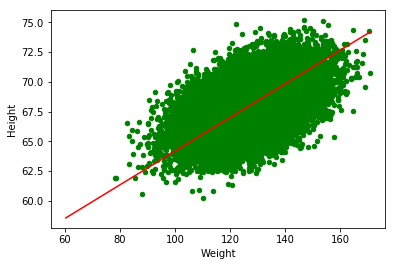

In [27]:
data.plot( x ='Weight',y = 'Height' ,kind = 'scatter',color = 'g')
x = np.linspace(data['Height'].min() , data['Weight'].max(),100)
w0= 50.06321916886750 
w1= 0.14109203728834388
y = w0+w1*x
plt.plot (x,y,color = 'red')